In [16]:
# hidden boring setup cell
%reload_ext autoreload
%autoreload 2
from sage_cluster_pictures import *
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True
set_verbose(0)

## Symbolic clusters and BY-trees

As long as we are careful, nothing forces us to use genuine $p$-adic numbers to build our BY-trees. We can replicate the analysis in 3.3.1 of Betts Tamagawa v2

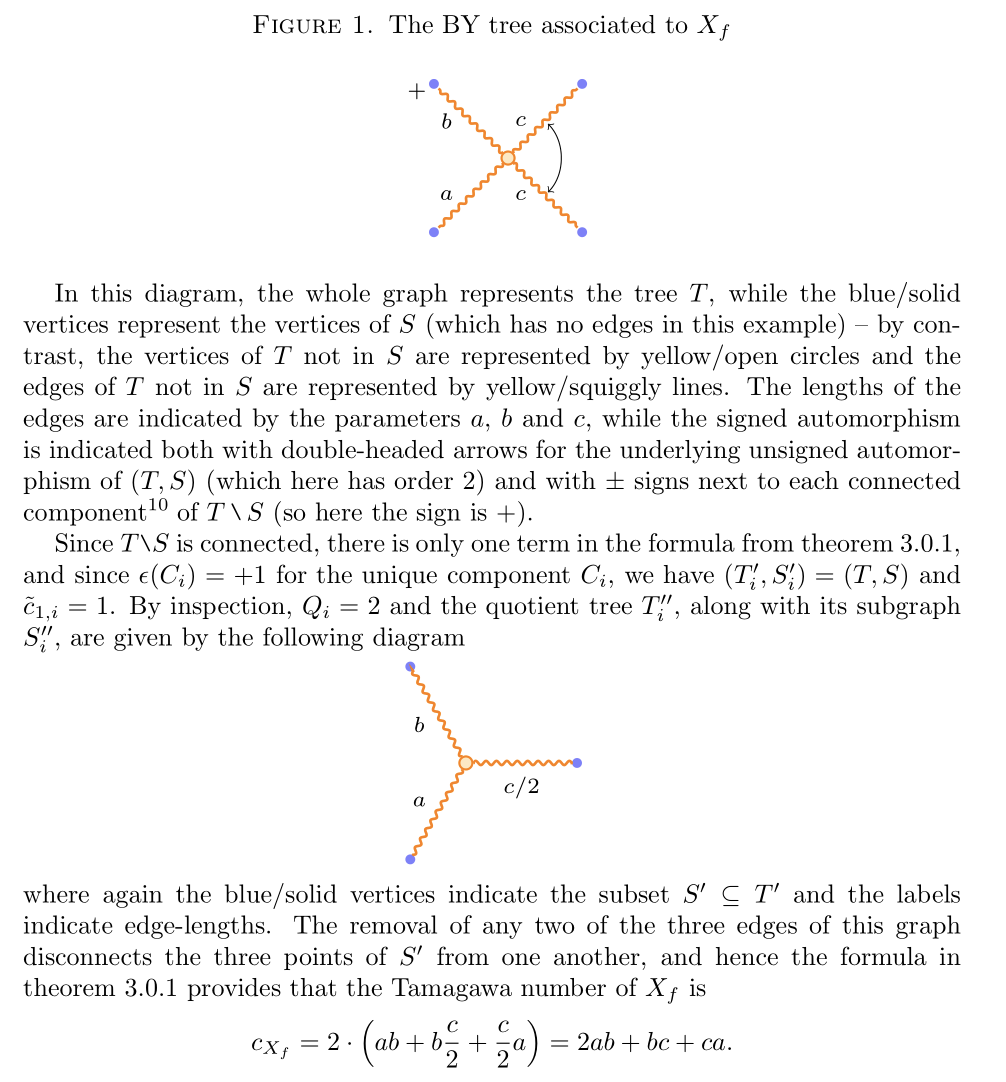

In [37]:
# picture time
from IPython.display import Image
Image(filename = "img/betts.png", width=int(600))

In [17]:
a = var('a', domain="positive")
b = var('b', domain="positive")
c = var('c', domain="positive")

In [21]:
R = Cluster([[2*a, a, 0, 0, 0, 0, 0, 0],
            [a, 2*a, 0, 0, 0, 0, 0, 0],
            [0, 0, 2*b, b, 0, 0, 0, 0],
            [0, 0, b, 2*b, 0, 0, 0, 0],
            [0, 0, 0, 0, 2*c, c, 0, 0],
            [0, 0, 0, 0, c, 2*c, 0, 0],
            [0, 0, 0, 0, 0, 0, 2*c, c],
            [0, 0, 0, 0, 0, 0, c, 2*c],
           ])

view(R)

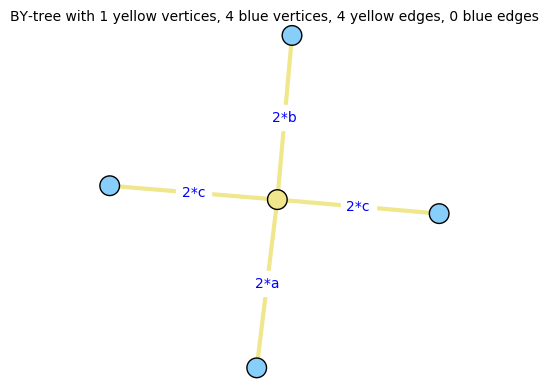

In [25]:
A,B,C1,C2 = R.children()
T = R.BY_tree()
T

In [26]:
F = BYTreeIsomorphism(T, T,
                      lambda x: {A:A, B:B, C1:C2, C2:C1, R:R}[x],
                      lambda Y: 1)

In [27]:
T.tamagawa_number(F)

8*a*b + 4*a*c + 4*b*c

For a second example, we could copy Betts again?

![title](img/betts.png)